> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMBd movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> in this project i will anlays date set of TMBd discussing best movies rating and its geners then the best movies that maked high revenue. 
>columns

### Question(s) for Analysis
>**Q1**:what are most populer geners movies for year to year ?

> **Q2**:what is top 5 movies regard to popularity and revenue?

> **Q3**:what number of movies in each year?

> **Q4**:Did high popularity,runtime,budget achieve high revenue? 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [1]:
#!pip install --upgrade pandas

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.5)


<a id='wrangling'></a>
## Data Wrangling




### -Gathering Dataset


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
mv = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
mv.head(200)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,331781,tt2870648,0.738404,0,8413144,Amy,Amy Winehouse|Mark Ronson|Tony Bennett|Pete Do...,http://www.amy-movie.com/,Asif Kapadia,The girl behind the name.,...,"A documentary on the life of Amy Winehouse, th...",128,Documentary|Music,On The Corner Films|Universal Music,7/3/15,345,7.5,2015,0.000000e+00,7.740089e+06
196,253161,tt2334733,0.729900,0,0,Madame Bovary,Mia Wasikowska|Ezra Miller|Laura Carmichael|He...,NaN,Sophie Barthes,NaN,...,"The classic story of Emma Bovary, the beautifu...",118,Drama,A Company Filmproduktionsgesellschaft|Aleph Mo...,6/4/15,52,5.3,2015,0.000000e+00,0.000000e+00
197,312831,tt2474976,0.719407,0,0,The Hallow,Joseph Mawle|Bojana NovakoviÄ‡|Michael McElhat...,http://www.corinhardy.com/the-woods/,Corin Hardy,Nature has a dark side.,...,A family who moved into a remote mill house in...,97,Fantasy|Horror,Prescience|Bord Scannan na hEireann / Irish Fi...,11/6/15,122,4.9,2015,0.000000e+00,0.000000e+00
198,316322,tt4215332,0.714131,0,0,Barbie in Princess Power,Britt Irvin|Michael Kopsa|Kelly Sheridan,NaN,Zeke Norton,Take flight with a new kind of princess!,...,Barbie is Kara - a modern-day princess with a ...,74,Family|Animation,Mattel Playground Productions,1/29/15,13,5.5,2015,0.000000e+00,0.000000e+00


In [4]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
mv.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
mv.shape

(10866, 21)

In [7]:
mv.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [8]:
mv.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


### -Data Cleaning

 

### first drop unnecessary columns :


In [9]:
drp=['id','imdb_id','homepage','tagline','keywords','overview','production_companies','release_date']
mv.drop(drp,axis=1,inplace=True)

In [10]:
mv.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [104]:
mv.shape

(10866, 13)

### separete genres column values using explode function :
>by append new column called 'classification' and drop 'genres' column

In [11]:
##separate genres values
df=mv.assign(classification=mv['genres'].str.split('|')).explode('classification')


In [12]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,classification
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [13]:
## drop genres column
df.drop('genres',axis=1,inplace=True)


In [14]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,classification
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


## clear rows with nan values: 
> from checking dataset tail i noticed that there is zeros so i will replace it with nan to be dropped :

In [15]:
df.replace(0,np.nan,inplace=True)#replace zeros with nan values

In [106]:
df.shape

(10290, 13)

In [17]:
df.dropna(axis=0,inplace=True)#clear nan vlaues

In [18]:
#check for nan values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10295 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10295 non-null  float64
 1   budget          10295 non-null  float64
 2   revenue         10295 non-null  float64
 3   original_title  10295 non-null  object 
 4   cast            10295 non-null  object 
 5   director        10295 non-null  object 
 6   runtime         10295 non-null  float64
 7   vote_count      10295 non-null  int64  
 8   vote_average    10295 non-null  float64
 9   release_year    10295 non-null  int64  
 10  budget_adj      10295 non-null  float64
 11  revenue_adj     10295 non-null  float64
 12  classification  10295 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 1.1+ MB


In [19]:
df.shape

(10295, 13)

In [20]:
df.isna().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
classification    0
dtype: int64

In [21]:
#check for duplicats
sum(df.duplicated())

5

In [22]:
#remove duplicates
df.drop_duplicates(inplace = True)

In [23]:
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (what are most populer geners movies for year to year ?)

In [125]:
#this function is used to plot scatter used in Q4
def scatterplot_tool(df,xvar,yvar,color):
    '''
    this functio for plot scatter quickly every time it takes data frame df and x axis ,yaxis, color
    '''
    #draw scatterplot
    df.plot(kind='scatter',x=xvar,y=yvar,color=color,figsize=(14,8));#draw scatterplot
    #write a title
    plt.title(f'Relation ship between {xvar} and {yvar}'.title(),fontsize = 14 ,weight= "bold");
    #write and format x label
    if(xvar =='budget' ):
        plt.xlabel(xvar+"  (million $)".title(),fontsize=14,weight="bold")
    elif xvar=='popularity':
        plt.xlabel(xvar+"  (million population) ".title(),fontsize=14,weight="bold")
    else :
        plt.xlabel(xvar+"  (minute)".title(),fontsize=14,weight="bold")
    #write ant format y label
    plt.ylabel(yvar+"  (million $) ".title(),fontsize=14,weight="bold")

In [26]:
## create list with years:
years=df['release_year'].unique().tolist()

In [27]:
years.sort()
print(years)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [28]:
y=df['classification'].unique().tolist()#get genres name

In [29]:
print(y)

['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'Foreign', 'TV Movie']


In [30]:
# create data frame with popouler genre produced in each year using filters and value_counts:
pop_list =[]
for year in years :
    d1 = df[df['release_year'] == year] 
    d3 = d1.groupby(['release_year'])['classification'].value_counts().idxmax()#get max values of each genre
    pop_list.append(d3)#append tuple with year and most genre in it

df_popular = pd.DataFrame(pop_list, columns=['release_year', 'popular_genre_produced']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_popular

,release_year,popular_genre_produced
0,1960,Drama
1,1961,Drama
2,1962,Drama
3,1963,Drama
4,1964,Drama
5,1965,Drama
6,1966,Action
7,1967,Drama
8,1968,Drama
9,1969,Adventure


### show number of each most popular genre:

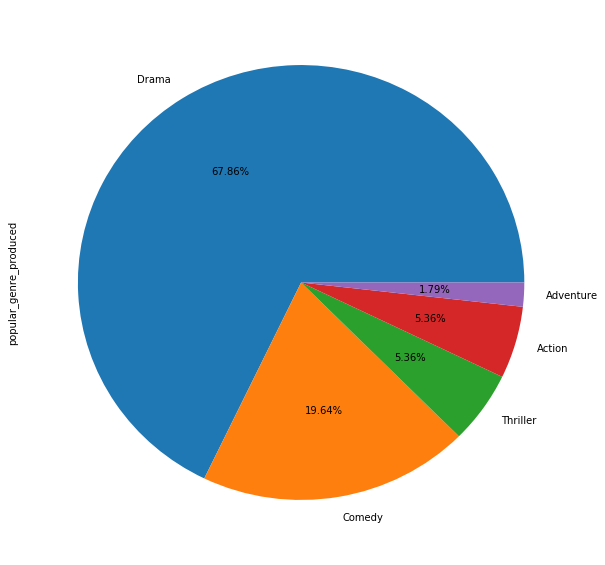

In [58]:
#most popular genres:
df_popular['popular_genre_produced'].value_counts().plot(kind='pie',figsize=(10,10),autopct='%1.2f%%');


>from pie chart we noticed that drama is the most populer with (67.8%) and the second is comedy with (19,64%) then thriller and action with (5,36%) and at last (1.79%) 

### Research Question 2  (what is top 5 movies regard to popularity and revenue?)

In [85]:
#create dataframe to sort movies according to revenue

x = pd.DataFrame(columns=['original_title','revenue'])

In [86]:
#create (original title) column for columns names

x['original_title']=df['original_title']

In [87]:
# create revenue column

x['revenue']=df['revenue']

#remove duplicates

y = x.drop_duplicates()

# sort by revenue

z=y.sort_values(by='revenue',ascending = False,ignore_index=True) 

In [88]:
#get five elements of each coloumn
axis1 = list(z['original_title'][:5])
axis2 = list(z['revenue'][:5])

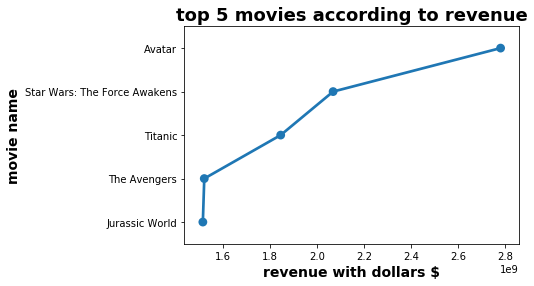

In [89]:
plot1=sns.pointplot(x=axis2,y=axis1);
#set title and format
plot1.set_title("top 5 movies according to revenue",weight="bold",fontsize=18);
#set title for x_axis and format
plot1.set_xlabel("revenue with dollars $",weight="bold",fontsize=14);
#set title for y_axis and format
plot1.set_ylabel("movie name",weight="bold",fontsize=14);

>the plot show that (Avatar) movie achive hghiest revenue with 2.81e9 and the secnod place (starwars) with 2.11e9 that big diiffernece between avatar and other movies

In [91]:
#create dataframe to sort movies according to popularity
a = pd.DataFrame(columns=['original_title','popularity'])

In [92]:
a['original_title']=df['original_title']

In [93]:
a['popularity']=df['popularity']
b = a.drop_duplicates()#remove dupicates
c=b.sort_values(by='popularity',ascending = False,ignore_index=True)# sort by popularity

In [94]:
# get first 5 elements
axis1 = list(c['original_title'][:5])
axis2 = list(c['popularity'][:5])

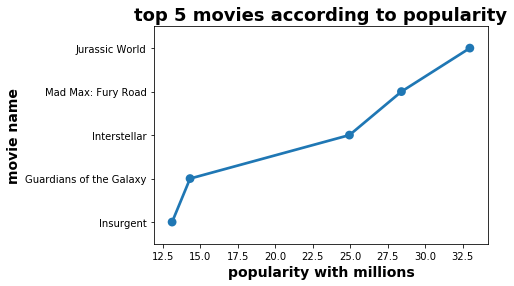

In [95]:
plot2=sns.pointplot(x=axis2,y=axis1);
plot2.set_title("top 5 movies according to popularity",fontsize=18,weight="bold");
plot2.set_xlabel("popularity with millions",fontsize=14,weight="bold");
plot2.set_ylabel("movie name",fontsize=14,weight="bold");

> it shows tha the (jurassic world)movie is the most populer movie with 32,5 million people and the second is (mad max)with slightly less than jurassic world

>from two above graphs shows that popularity not necesssary to make u achieve high revenue in the future

### Research Question 3  (what number of movies in each year ?)

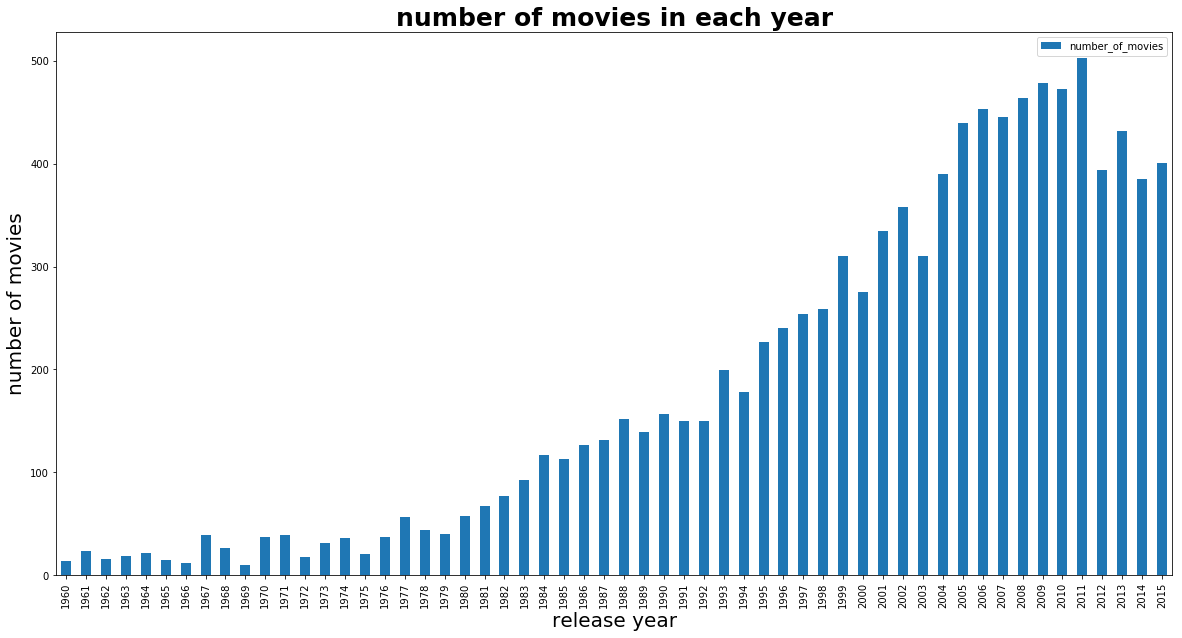

In [96]:
#list for num of movies in each year :
num_list =[]
for year in years :
    #filter years
    x = df[df['release_year'] == year]
    #append num of movies in list
    num_list.append((year,x.shape[0]))
#convert to data frame
num_df=pd.DataFrame(num_list, columns=['release_year', 'number_of_movies']).sort_values('release_year').reset_index().drop(['index'], axis=1)

#draw diagram
t = num_df.plot(x ='release_year', y='number_of_movies', kind = 'bar',figsize=(20,10));
t.set_title("number of movies in each year",fontsize=25,weight="bold");
t.set_ylabel("number of movies",fontsize=20);
t.set_xlabel("release year",fontsize=20);

>it shows that 2011 is the most year movies realeased in it then it become less than it after that year

### Research Question 4 (Did high popularity,runtime,budget achieve high revenue?)

In [122]:
#see ppoularity column statistics
df['popularity'].describe()

count    10290.000000
mean         1.263538
std          1.608178
min          0.001117
25%          0.478476
50%          0.844350
75%          1.464010
max         32.985763
Name: popularity, dtype: float64

In [123]:
#get high popularity above mean
hipop_df=df[df['popularity']>=1.263538]

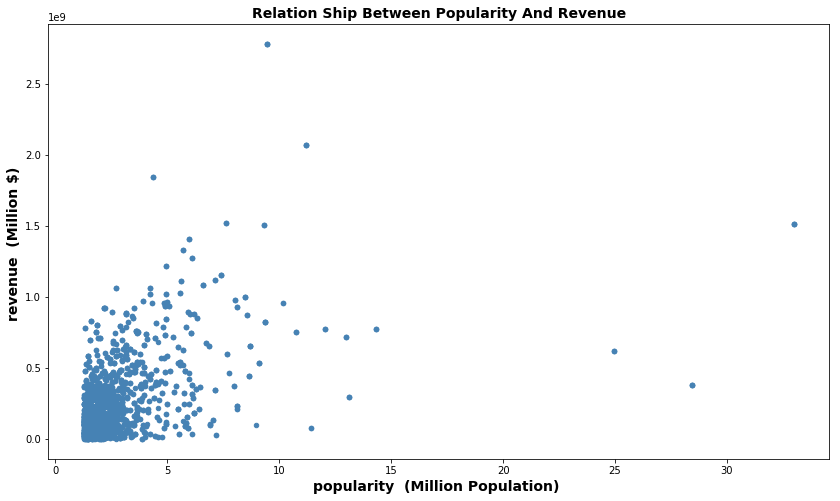

In [126]:
#call scatterplot_tool function:
scatterplot_tool(hipop_df,'popularity','revenue','steelblue')

>from above scatter plot shows that it may the film had high popularity and dont achive the hieghest revenue 
>there is high revenue in between 5 and 10 million popularity with revenue around 1 to 1.5 million dollar and most movies revenues between 0 to 0.5 million dollars

In [127]:
#see runtime column statistics 
df['runtime'].describe()

count    10290.000000
mean       109.563071
std         20.342130
min         15.000000
25%         96.000000
50%        106.000000
75%        119.000000
max        338.000000
Name: runtime, dtype: float64

In [128]:
#get big runtime above mean
rn_df=df[df['runtime']>=109.563071]

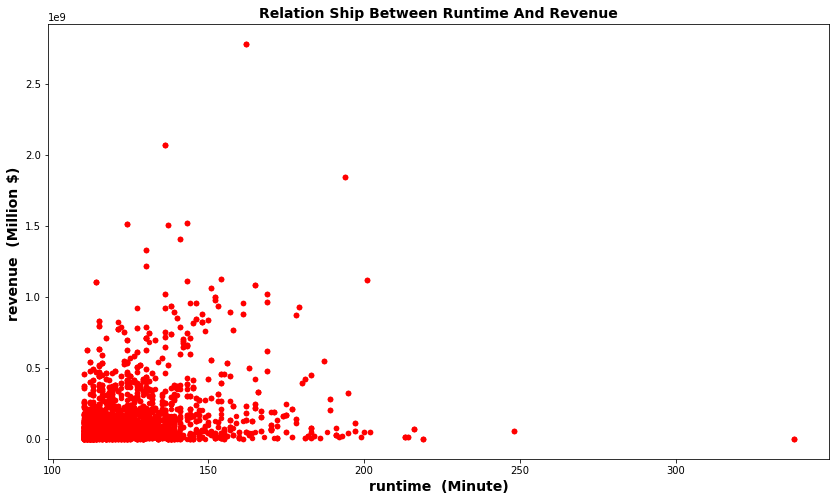

In [129]:
#call scatterplot_tool function:
scatterplot_tool(rn_df,'runtime','revenue','red')

>it seems that Run time between 100 and 150 achieve alot of high revenues around 0.5 to 1.5 million dollar

In [130]:
# see budget columns statistics
df['budget'].describe()

count    1.029000e+04
mean     4.168853e+07
std      4.533143e+07
min      1.000000e+00
25%      1.100000e+07
50%      2.548500e+07
75%      5.700000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [131]:
#get high budget above mean
bud_df=df[df['budget']>=4.168853e+07]

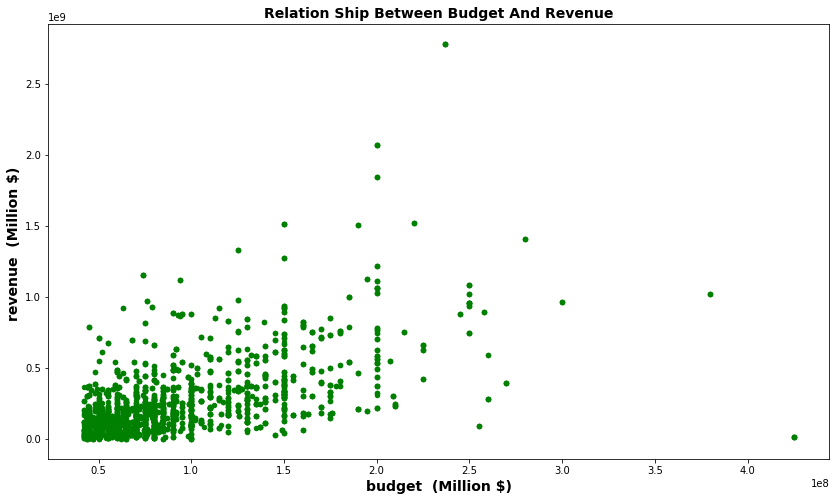

In [132]:
#call scatterplot_tool function:
scatterplot_tool(bud_df,'budget','revenue','green')

>this graph show that if you have more budget to produce movie u will achieve high revenue but you may not make profit from it as from 1 to 1.5 million dollars budget achieved from 0 tp 1 million dollar revenue with negative profit 

<a id='conclusions'></a>
## Conclusions
### Questions:
>**Q1**:what are most populer geners movies for year to year ?

> **Q2**:what is top 5 movies regard to popularity and revenue?

> **Q3**:what number of movies in each year?

> **Q4**:Did high popularity,runtime,budget achieve high revenue? 
###R
> **From Research Q1**: from dataset with years and most genres in each year i found that there is 5 genres populr drama , comdey ,thriller ,action and adventure and most release is drama in blues part

> **From Research Q2**: according to pointplot if wesort by revenue we found that avatar is the most movie acheive high      revenue , and if we sort by popularity it shows that jurassic world is the most popular movie

> **From Research Q3**:we found that 2011 is most year to produce movies 

> **From Research Q4**: first scatter plot shows that if popularity increases the revenue increases , scond scaater graph it is not necessary to increase run time to achieve more revenue and last scatter pragh shows that if you spend money more on the movie you will get high revenue 
## limitations:
>In cleanin  stage i had dropped many columns as it unnecessary information for for my analyis stage as before that data set was 10866 rows, 21 columns after dropping those columns it becomes 10866 rows ,13 columns

>Then i used explode function to separate genres from '|' as i need it for question 1 be append new column called classification and dropped orignal column called genres

>After that i removed nan vlaues as its meaning less for a movies to have a nan value in its row for budget or revenue or other so date shape reduced to 10290rows, 13columns

## Submitting your Project 



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])